In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [11]:
df = pd.read_csv('data/medical_dataset.csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

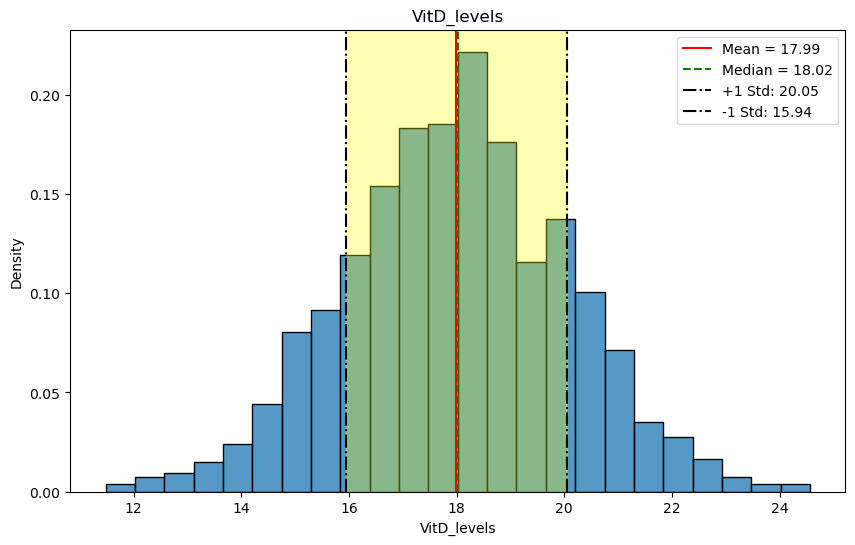

In [13]:
col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
z_scores_scipy = stats.zscore(feature)


fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='density')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
plt.axvline(mean + std, color='black', ls='-.', label=f'+1 Std: {mean+std:.2f}')
plt.axvline(mean - std, color='black', ls='-.', label=f'-1 Std: {mean-std:.2f}')
plt.axvspan(mean - std, mean + std, color='yellow',alpha=0.30)

ax.set_title(f'{col}')
ax.legend();






In [14]:
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
print(kurt)

3.013147515833447


- The "VitD_levels" feature is a continuous variable. 
- The distribution of "VitD_levels" displays a slight negative skew. 
- The kurtosis of the "VitD_levels" distribution appears to be mesokurtic.

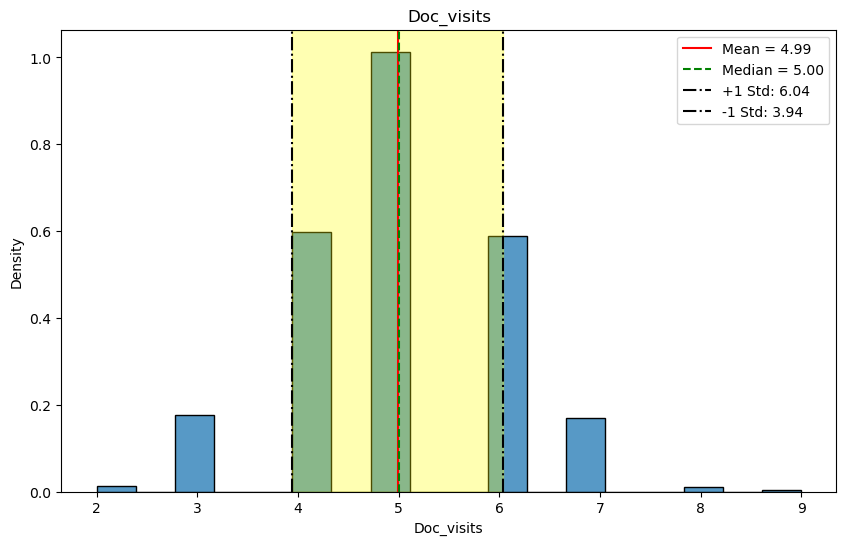

In [15]:
col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
z_scores_scipy = stats.zscore(feature)


fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='density')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
plt.axvline(mean + std, color='black', ls='-.', label=f'+1 Std: {mean+std:.2f}')
plt.axvline(mean - std, color='black', ls='-.', label=f'-1 Std: {mean-std:.2f}')
plt.axvspan(mean - std, mean + std, color='yellow', alpha=0.3)

ax.set_title(f'{col}')
ax.legend();


In [16]:
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
print(kurt)

2.9919958083381206


- The "Doc_visits" feature is a discrete variable. 
- The distribution of "Doc_visits" doesn't have a significant skew
- The distribution is mesokurctic


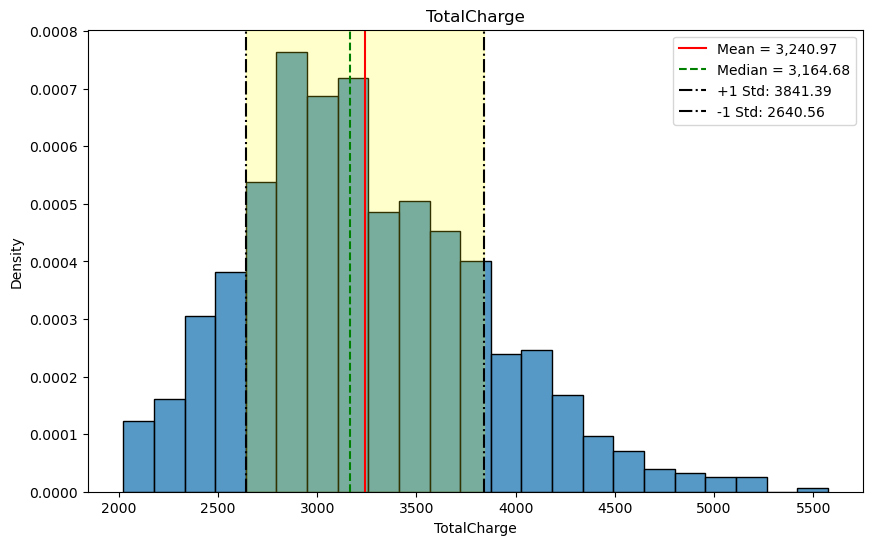

In [17]:
col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
z_scores_scipy = stats.zscore(feature)


fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='density')
ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
plt.axvline(mean + std, color='black', linestyle='-.', label=f'+1 Std: {mean+std:.2f}')
plt.axvline(mean - std, color='black', linestyle='-.', label=f'-1 Std: {mean-std:.2f}')
plt.axvspan(mean - std, mean + std, color='yellow', alpha=0.2)

ax.set_title(f'{col}')
ax.legend();

In [18]:
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
print(kurt)

3.2650077463439384


- The "TotalCharge" feature is a continuous variable.
- The distribution of "TotalCharge" shows a positive skew. 
- The kurtosis of the "TotalCharge" distribution is mostly mersokurctic but somewhat leptokurtic

